In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ml-prod/heart_cleveland_upload.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [14]:
continuous_feature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = list(set(df.columns) - set(continuous_feature))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


#### Распределение для непрерывных признаков

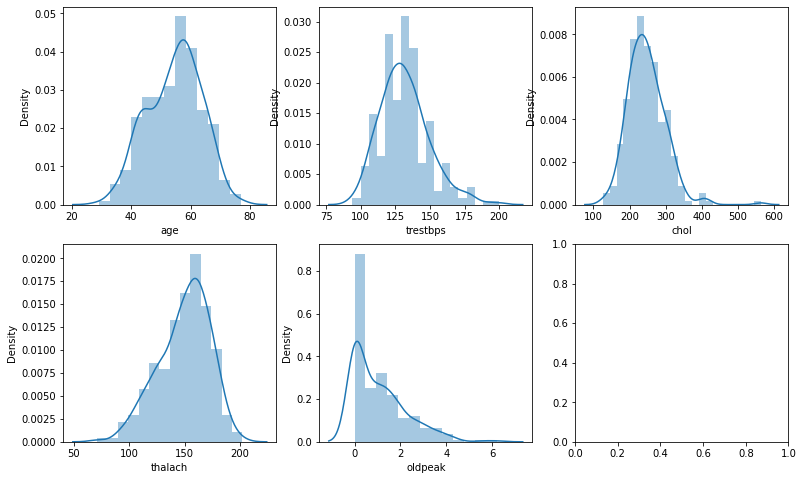

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(13, 8))

ax_array = [axis for row in ax for axis in row] 

for axis, feature in zip(ax_array, continuous_feature):
    sns.distplot(df[feature], ax=axis);

#### Распределение для категориальных признаков

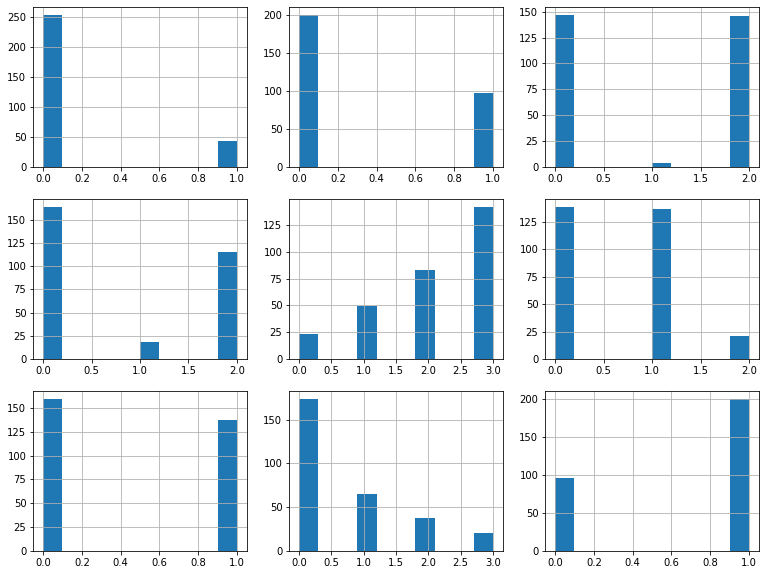

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(13, 10))

ax_array = [axis for row in ax for axis in row] 

for axis, feature in zip(ax_array, categorical_features):
    df[feature].hist(ax=axis)

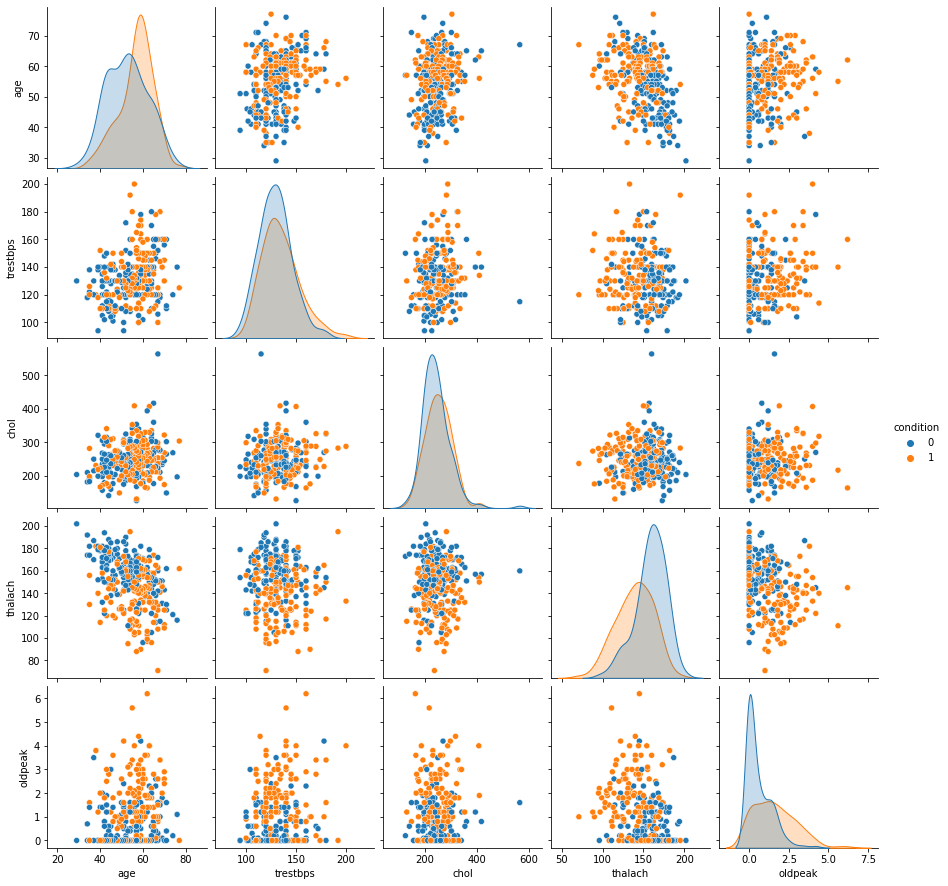

In [44]:
sns.pairplot(df, vars = continuous_feature, hue='condition')

#### Смотрим корреляционную матрицу

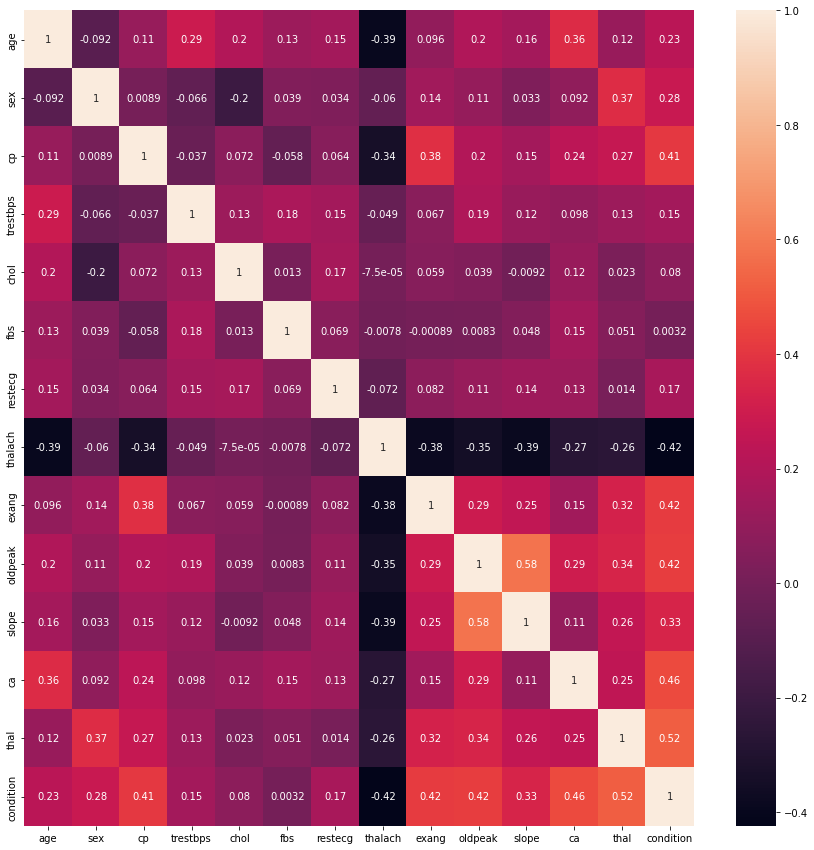

In [10]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True, ax=ax)